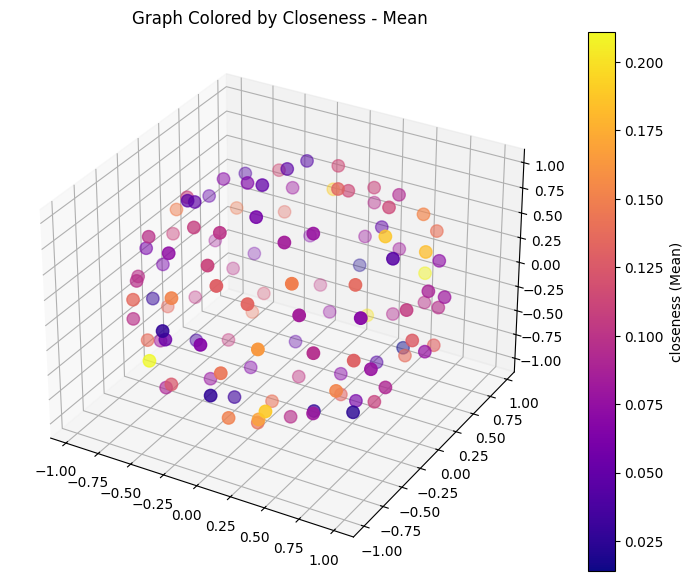

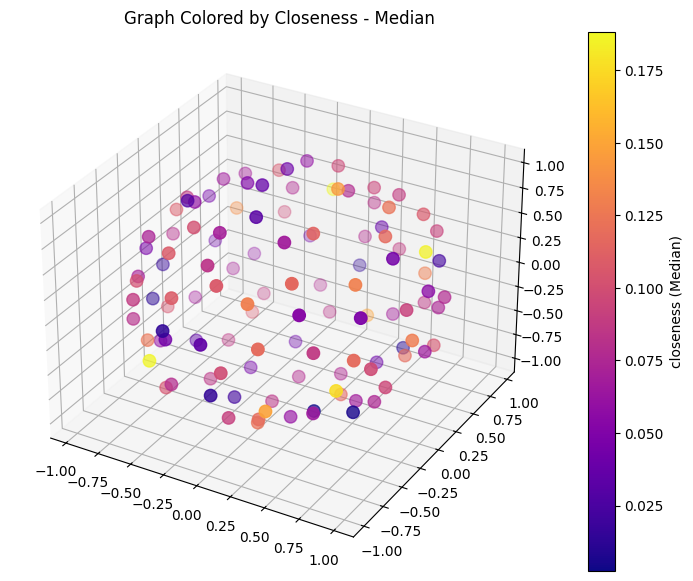

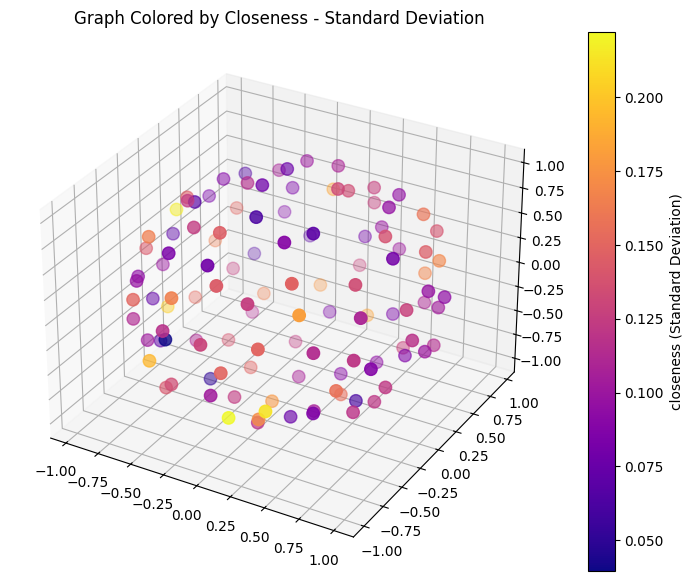

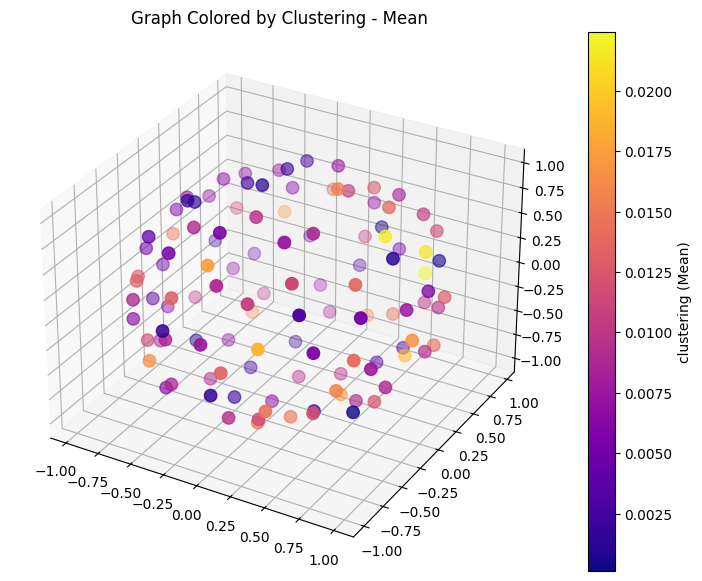

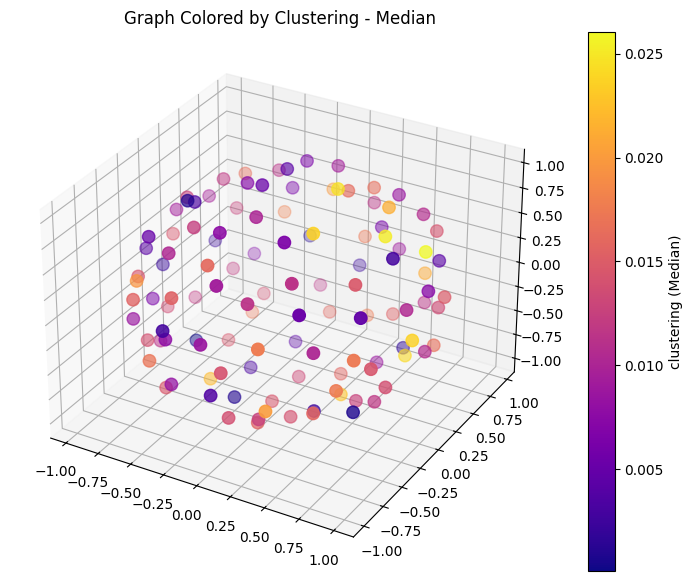

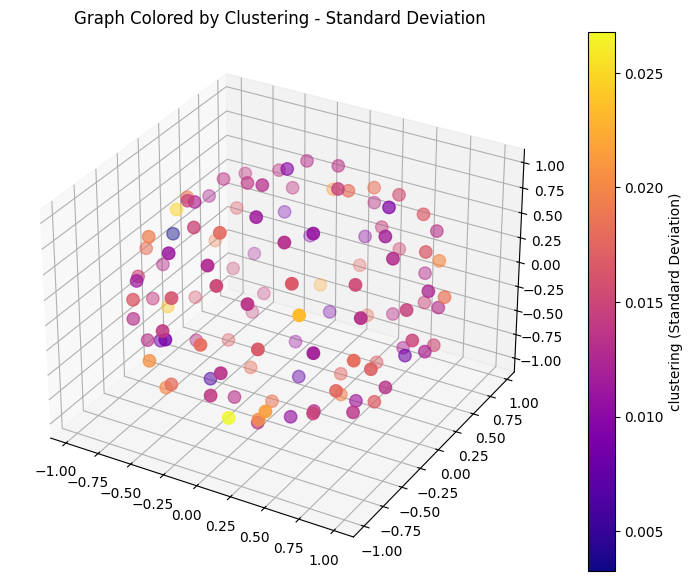

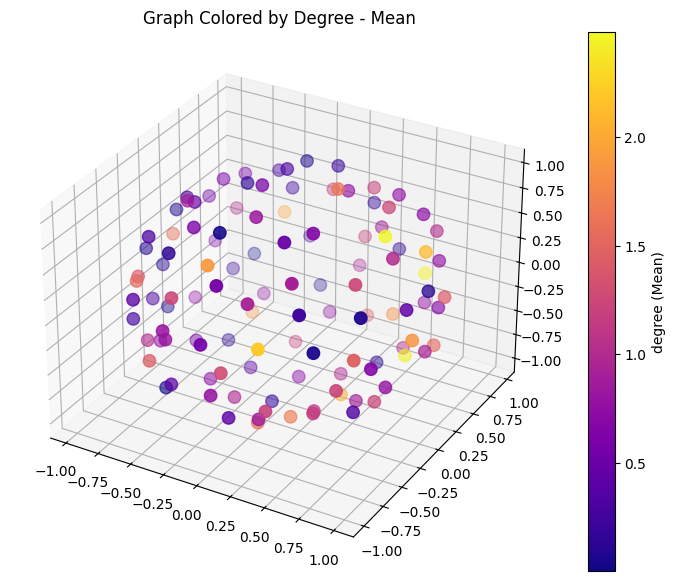

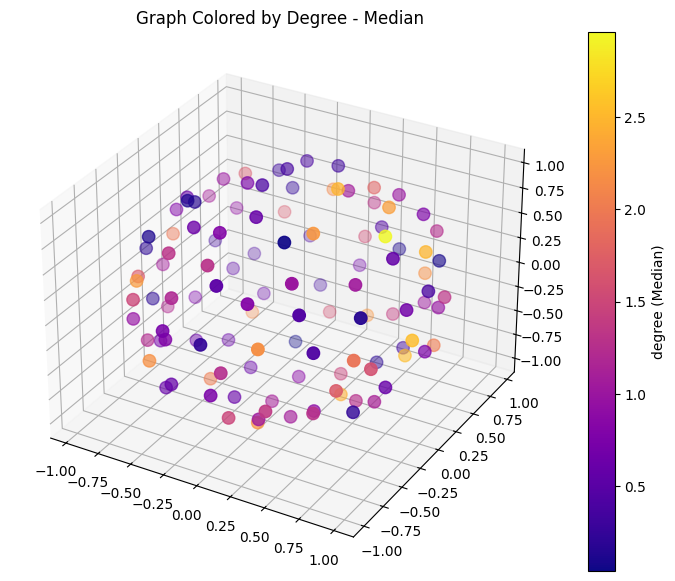

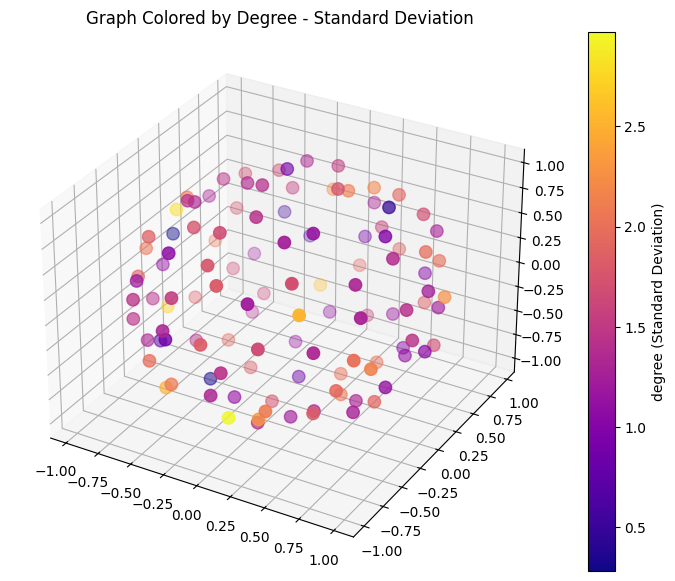

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import pandas as pd

# Load the CSV file
file_path = 'analysis/ppmi/60_70/comparison/pd/node_differences.csv'
data = pd.read_csv(file_path)

# Extract unique nodes and metrics
nodes = data['Node'].unique()
metrics = data['Metric'].unique()

# Create a graph and assign metrics as node attributes
def create_graph_with_metrics(data):
    G = nx.Graph()

    for node in nodes:
        node_data = data[data['Node'] == node]
        node_metrics = {
            row['Metric']: {
                'Mean': row['Mean'],
                'Median': row['Median'],
                'Standard Deviation': row['Standard Deviation']
            } for _, row in node_data.iterrows()
        }
        G.add_node(node, **node_metrics)

    return G

G = create_graph_with_metrics(data)

# Visualize the graph in 3D with node colors based on a selected statistic
def visualize_graph_by_statistic(G, metric, statistic, title="Graph Visualization"):
    """
    Visualize a graph in 3D using NetworkX and Matplotlib, coloring nodes by the chosen metric's statistic.
    """
    pos = nx.spring_layout(G, dim=3, seed=42)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)

    # Extract statistic values for coloring
    values = [G.nodes[node].get(metric, {}).get(statistic, 0) for node in G.nodes()]
    colormap = plt.cm.plasma  # Use a more vivid colormap
    norm = mcolors.Normalize(vmin=min(values), vmax=max(values))

    # Draw nodes with colors based on the statistic
    x = [pos[i][0] for i in G.nodes()]
    y = [pos[i][1] for i in G.nodes()]
    z = [pos[i][2] for i in G.nodes()]
    colors = [colormap(norm(value)) for value in values]

    ax.scatter(x, y, z, c=colors, s=80, label=f'Nodes ({metric} - {statistic})')  # Increase node size for visibility

    # Draw edges
    for edge in G.edges():
        x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
        y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
        z_edge = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x_edge, y_edge, z_edge, c='black', alpha=0.7, linewidth=0.8)  # Darker and slightly thicker edges

    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, label=f'{metric} ({statistic})')
    plt.show()

# Visualize the graph for each metric and statistic
statistics = ['Mean', 'Median', 'Standard Deviation']
for metric in metrics:
    for statistic in statistics:
        visualize_graph_by_statistic(G, metric=metric, statistic=statistic, title=f"Graph Colored by {metric.capitalize()} - {statistic}")

